## 03_03: Manipulate images with Pillow

* Pillow: https://pillow.readthedocs.io

In [32]:
# pillow - previously known as Python Imaging Library, keeps the same Python name

import PIL
import PIL.Image
import PIL.ImageOps
import PIL.ImageEnhance  
import PIL.ImageFilter

In [33]:
import requests
import io

In [34]:
# cached/20130903_002924_512_0171.jpg
# cached/20130903_082900_512_0171.jpg

### first image:

In [35]:
# nahrá zo súboru
img1 = PIL.Image.open('cached/20130903_002924_512_0171.jpg')

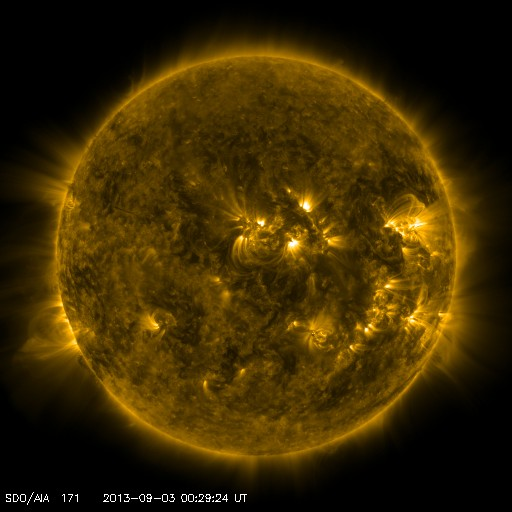

In [36]:
img1

In [37]:
type(img1)

PIL.JpegImagePlugin.JpegImageFile

### second image:

In [38]:
# druhý obrázok nahrá z webu
req = requests.get('https://sdo.gsfc.nasa.gov/assets/img/browse/2013/09/03/20130903_082900_512_0171.jpg')
img2 = PIL.Image.open(io.BytesIO(req.content))

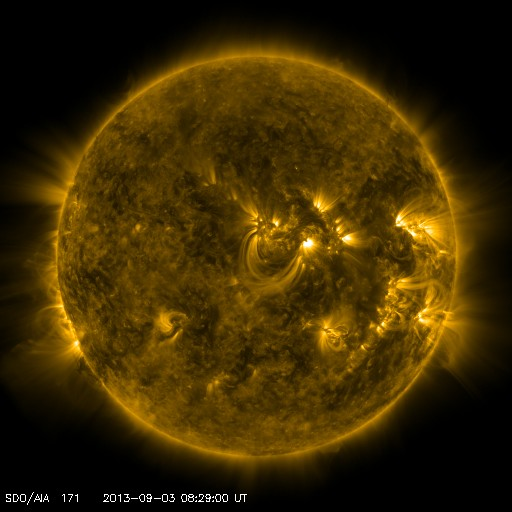

In [39]:
img2

In [49]:
# checking image attributes
img1.size, img1.mode

((512, 512), 'RGB')

### resizing images:

In [41]:
img1_resized = img1.resize((400,400))
img2_resized = img2.resize((400,400))

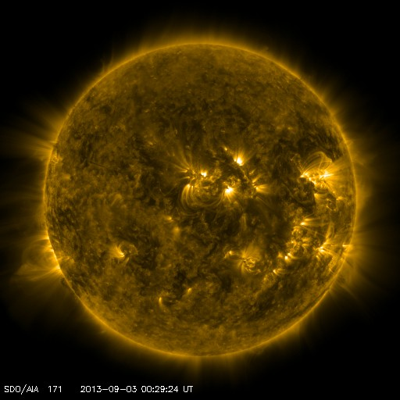

In [42]:
img1_resized

### follows a showcase, what we can do with the image:

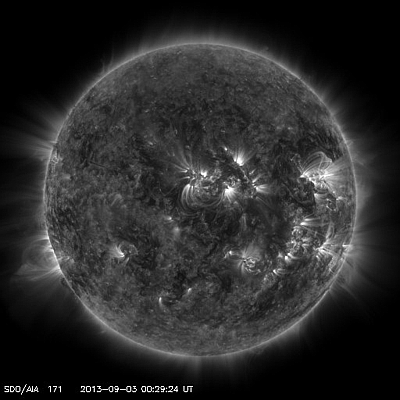

In [43]:
img1_resized.convert('L').filter(PIL.ImageFilter.SHARPEN) # image sa neprepisuje, toto je len ukážka

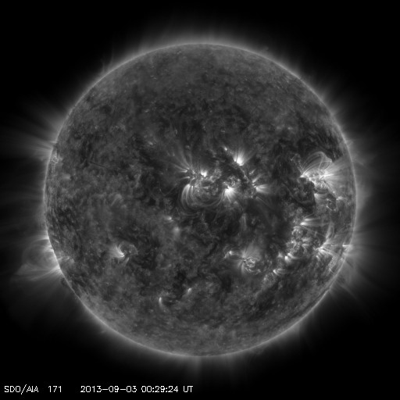

In [44]:
img1_resized.convert('L') # L = luminance mode, ukážka

# now colorize to red / cyan respectively, and blend the images.  
# and finally enhance.

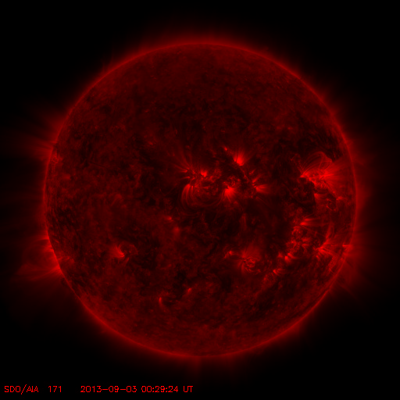

In [45]:
img1_red = PIL.ImageOps.colorize(img1_resized.convert('L'), (0,0,0), (255,0,0)) # colorize (grey_scaled image) from black to red.
img1_red

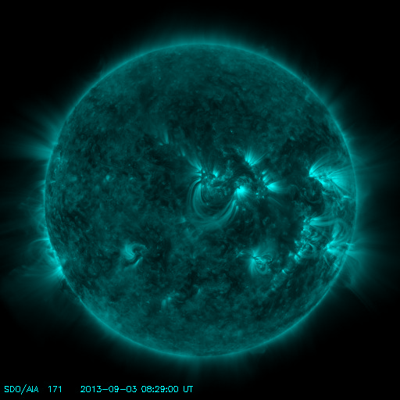

In [46]:
img2_cyan = PIL.ImageOps.colorize(img2_resized.convert('L'), (0,0,0), (0,255,255)) # colorize (grey_scaled image) from black to cyan.
img2_cyan

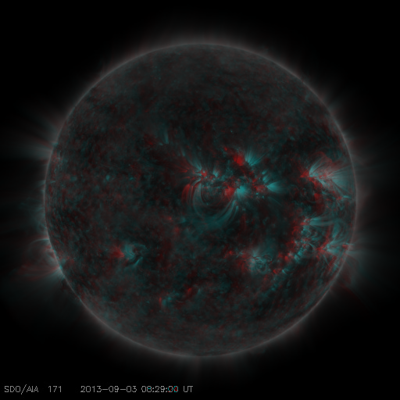

In [47]:
blended = PIL.Image.blend(img1_red, img2_cyan, 0.5) # 0.5 ...means equal weight (rovnakou mierou, obidva spojiť)
blended # looks a bit dark

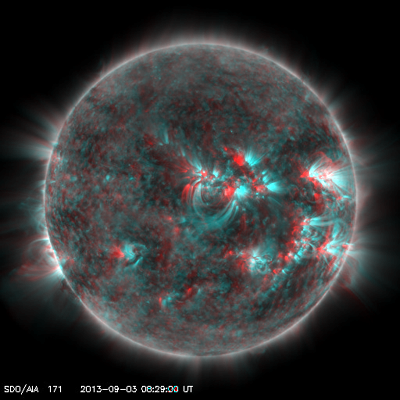

In [48]:
PIL.ImageEnhance.Brightness(blended).enhance(2.5) # create Brightness() object (from blended image) and then call the enhance() method.
# final anaglyph https://en.wikipedia.org/wiki/Anaglyph_3D

In [ ]:
# done